In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import pandas as pd


     |████████████████████████████████| 972kB 5.5MB/s 
     |████████████████████████████████| 6.5MB 12.1MB/s 
     |████████████████████████████████| 14.8MB 263kB/s 
     |████████████████████████████████| 225kB 4.3MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp36-none-any.whl size=37264 sha256=01d4f85fa217976cb2d691c62a5896299d50d2f87e98793d2df7c4b7c58a7a0c
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [ ]:
%matplotlib inline
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

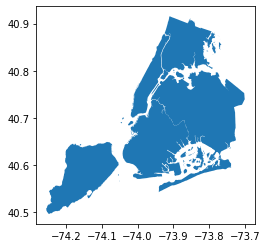

In [ ]:
newyork = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/ny.shp')
ny = newyork['geometry']
ny = ny.to_crs(epsg=4326)
crs = ny.crs
ny.plot()

In [ ]:
file = "Electric_Vehicle_Charging_Stations_in_New_York.csv"
url = "https://data.ny.gov/resource/7rrd-248n.json"
df = pd.read_json(url)
#display(df)
print(" \nCount total NaN (longitude, latitude) in a DataFrame : \n\n (", 
      df.latitude.isnull().sum(), ",", df.longitude.isnull().sum() , ")")
onlyny = df[(df['city']=='New York')|(df['city']=='Bronx')|(df['city']=='Queens')|(df['city']=='Brooklyn')|(df['city']=='Staten Island')]
df


 
Count total NaN (longitude, latitude) in a DataFrame : 

 ( 0 , 0 )


,fuel_type_code,station_name,street_address,intersection_directions,city,state,zip,station_phone,status_code,groups_with_access_code,access_days_time,ev_level2_evse_num,ev_network,ev_network_web,geocode_status,latitude,longitude,date_last_confirmed,id,updated_at,ev_connector_types,owner_type_code,open_date,ev_dc_fast_count,cards_accepted,ev_level1_evse_num
0,ELEC,CORNELL,37 Forest Home Dr,FOREST HOME 1; Parking Level 3FOREST HOME 2; -...,Ithaca,NY,14850,888-758-4389,E,Public,24 hours daily,6.0,ChargePoint Network,{'url': 'http://www.chargepoint.com/'},200-8,42.469059,-76.486687,2021-01-25T00:00:00.000,96757,2021-01-25 00:17:47,J1772,NaN,NaN,NaN,NaN,NaN
1,ELEC,Hampton Inn Rome - Tesla Destination,1352 Floyd Ave,NaN,Rome,NY,13441,315-709-0000 877-798-3752,E,Public,24 hours daily; for customer use only,3.0,Tesla Destination,{'url': 'https://www.tesla.com/destination-cha...,200-8,43.222098,-75.421363,2020-11-03T00:00:00.000,115229,2020-11-18 00:06:10,J1772 TESLA,P,2018-11-01T00:00:00.000,NaN,NaN,NaN
2,ELEC,TOWN GERMANTOWN,189 Main St,MUNICIPAL LOT,Germantown,NY,12526,888-758-4389,E,Public,24 hours daily,2.0,ChargePoint Network,{'url': 'http://www.chargepoint.com/'},GPS,42.132595,-73.882650,2021-01-25T00:00:00.000,149273,2021-01-25 00:17:47,J1772,NaN,NaN,NaN,NaN,NaN
3,ELEC,ERIE COUNTY,1711 Girdle Rd,ELMA MEADOWS,Elma,NY,14059,888-758-4389,E,Public,24 hours daily,2.0,ChargePoint Network,{'url': 'http://www.chargepoint.com/'},GPS,42.825420,-78.595024,2021-01-25T00:00:00.000,154704,2021-01-25 00:17:47,J1772,NaN,NaN,NaN,NaN,NaN
4,ELEC,ADAMS STATION,701 Baxter Ct,701 BAXTER; Bldg 701-706,Delmar,NY,12054,888-758-4389,E,Public,24 hours daily,2.0,ChargePoint Network,{'url': 'http://www.chargepoint.com/'},GPS,42.608073,-73.849243,2021-01-25T00:00:00.000,165397,2021-01-25 00:17:47,J1772,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ELEC,Fairfield Inn & Suites by Marriott Elmira Corn...,1600 County Rd 64,NaN,Horseheads,NY,14845,607-739-9200 877-798-3752,E,Public,24 hours daily; for customer use only; see fro...,3.0,Tesla Destination,{'url': 'https://www.tesla.com/destination-cha...,200-9,42.158820,-76.856120,2020-11-03T00:00:00.000,114953,2020-11-18 00:06:10,J1772 TESLA,P,2018-11-01T00:00:00.000,NaN,NaN,NaN
996,ELEC,SMITHTOWN,99 W Main St,WEST MAIN ST,Smithtown,NY,11787,888-758-4389,E,Public,24 hours daily,2.0,ChargePoint Network,{'url': 'http://www.chargepoint.com/'},GPS,40.855696,-73.197832,2021-01-25T00:00:00.000,123551,2021-01-25 00:17:47,J1772,NaN,NaN,NaN,NaN,NaN
997,ELEC,Point Place Casino - Tesla Destination,450-452 NY-31,NaN,Bridgeport,NY,13030,315-366-9610 877-798-3752,E,Public,24 hours daily; for customer use only,2.0,Tesla Destination,{'url': 'https://www.tesla.com/destination-cha...,200-9,43.154875,-75.965306,2020-11-03T00:00:00.000,114887,2020-11-18 00:06:10,TESLA,P,2018-11-01T00:00:00.000,NaN,NaN,NaN
998,ELEC,Icon Parking 300 E 59th Street - Tesla Destina...,300 E 59th St,NaN,New York,NY,10022,212-980-0215 877-798-3752,E,Public,24 hours daily; see front desk for access,3.0,Tesla Destination,{'url': 'https://www.tesla.com/destination-cha...,200-8,40.760421,-73.964418,2020-11-03T00:00:00.000,115083,2020-11-18 00:06:10,J1772 TESLA,P,2016-05-01T00:00:00.000,NaN,NaN,NaN


In [ ]:
st = gpd.GeoDataFrame(onlyny, geometry=gpd.points_from_xy(onlyny.longitude, onlyny.latitude), crs=crs)
stn=st[['latitude','longitude','city']]
stll = st[['geometry','latitude','longitude']]
stll

,geometry,latitude,longitude
10,POINT (-73.96936 40.76461),40.764608,-73.969355
24,POINT (-73.96378 40.81121),40.811206,-73.963782
39,POINT (-73.98920 40.73482),40.734817,-73.989198
48,POINT (-73.94773 40.77598),40.775975,-73.947732
52,POINT (-73.98583 40.77156),40.771561,-73.985834
...,...,...,...
987,POINT (-74.00274 40.75256),40.752558,-74.002736
990,POINT (-73.99099 40.69512),40.695115,-73.990993
993,POINT (-73.94853 40.78487),40.784865,-73.948526
998,POINT (-73.96442 40.76042),40.760421,-73.964418


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


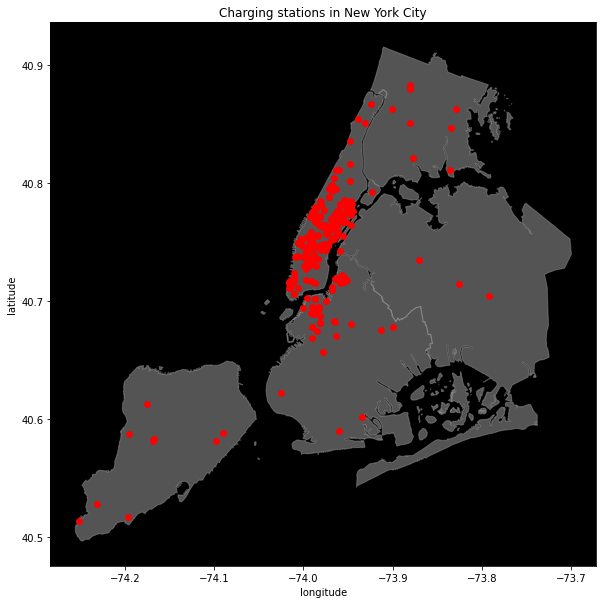

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ny.plot(ax=ax,alpha=0.4, edgecolor='darkgrey', color='lightgrey',zorder=1) # countries are in WGS84
st.plot(ax=ax, color='r',column=cluster, linewidth=0.8)
ax.set_facecolor('black')
plt.title('Charging stations in New York City') 
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()
fig.savefig('charging stations.pdf')

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = stll[['latitude']]
X_axis = stll[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

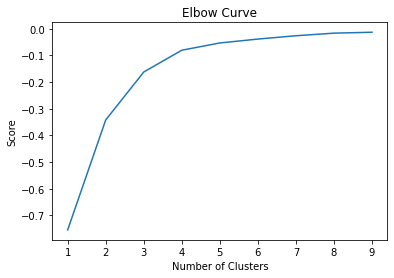

In [ ]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(stll[stll.columns[1:3]])
stll['cluster_label'] = kmeans.fit_predict(stll[stll.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(stll[stll.columns[1:3]])
stll.head(10)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geometry,latitude,longitude,cluster_label
10,POINT (-73.96936 40.76461),40.764608,-73.969355,2
24,POINT (-73.96378 40.81121),40.811206,-73.963782,2
39,POINT (-73.98920 40.73482),40.734817,-73.989198,0
48,POINT (-73.94773 40.77598),40.775975,-73.947732,2
52,POINT (-73.98583 40.77156),40.771561,-73.985834,2
53,POINT (-74.16781 40.58276),40.582763,-74.167812,1
55,POINT (-73.95561 40.75509),40.755093,-73.955605,2
56,POINT (-73.94793 40.83535),40.835351,-73.947934,2
62,POINT (-73.95053 40.78092),40.780918,-73.950526,2
63,POINT (-73.99204 40.73154),40.731544,-73.992045,0


In [ ]:
from geopandas import GeoSeries
from shapely.geometry import Point, Polygon
centers_clust = GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))

Text(0.5, 1.0, 'Main clusters of the charging stations')

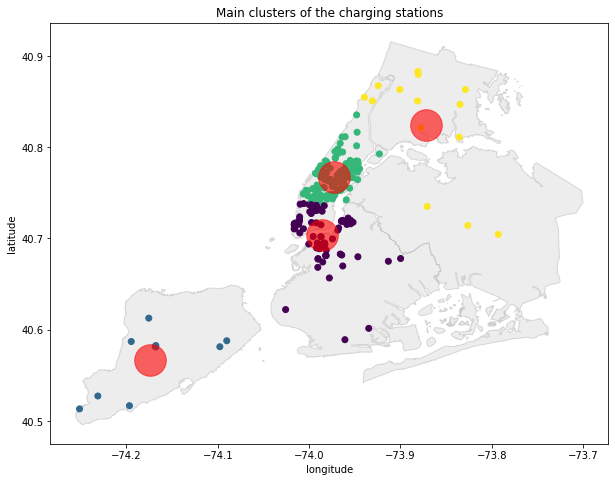

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ny.plot(ax=ax,alpha=0.4, edgecolor='darkgrey', color='lightgrey',zorder=1) # countries are in WGS84
stll.plot(column='cluster_label',ax=ax,cmap='viridis',zorder=2)
centers_clust.plot(ax=ax, alpha=0.6, marker='o',color='r',markersize=1000,zorder=3)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Main clusters of the charging stations')